In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load Titanic dataset from seaborn
data = sns.load_dataset("titanic")

# Show first 5 rows
print(data.shape)
data.head()


(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Keep only the most useful columns
df = data[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]

# Show first 5 rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
# Check missing values
print(df.isnull().sum())

# Fill missing Age with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing Embarked with mode (most common value)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Check again to confirm
print("\nAfter filling missing values:\n")
print(df.isnull().sum())


survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

After filling missing values:

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19872\4234116080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].fillna(df['age'].median())
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19872\4234116080.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [5]:
# Convert categorical columns into numeric using One-Hot Encoding
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)

# Show first 5 rows after encoding
df.head()


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [6]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (712, 8)
Testing data shape: (179, 8)


In [7]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully!")


✅ Logistic Regression model trained successfully!


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



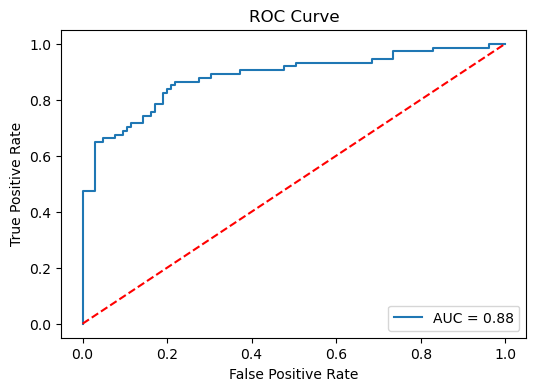

In [10]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (1 = survived)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0,1], [0,1], 'r--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
